In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


X shape: (60000, 28, 28)  - type: uint8
y shape: (60000,)  - type: uint8


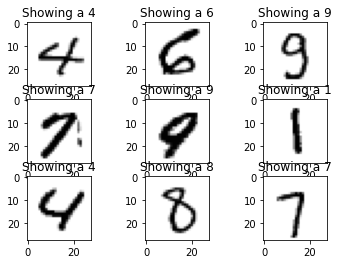

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

print('X shape: ' + repr(X_train_full.shape) , ' - type: ' + str(X_train_full.dtype))
print('y shape: ' + repr(y_train_full.shape) , ' - type: ' + str(X_train_full.dtype))

tmpidxs = np.random.permutation( X_train_full.shape[0] )[:9]

plt.clf()
for i in range(9):
    plt.subplot(3,3,i+1)
    tmp_idx = tmpidxs[i]
    plt.imshow(X_train_full[tmp_idx,:,:], cmap='gray_r')
    plt.title('Showing a ' + str( y_train_full[tmp_idx] ) )
plt.show()

In [ ]:
# also readjust range to float 0-1 for gradient descend training

X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(10, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

# why are the parameters 7960?
# why in the previous model, the parameters were the parameters 7850?

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


dense
dense_1
(784, 10)
(10,)
(10, 10)
(10,)


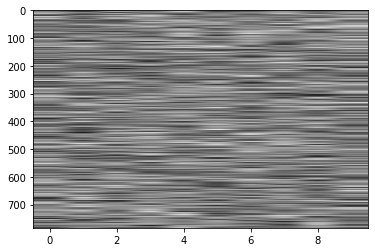

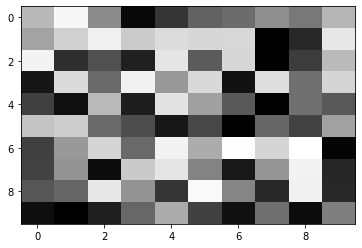

In [ ]:
hidden1 = model.layers[1]
print(hidden1.name)
hidden2 = model.layers[2]
print(hidden2.name)

# access weights and biases
weights1, biases1 = hidden1.get_weights()
print(repr(weights1.shape))
print(repr(biases1.shape))
weights2, biases2 = hidden2.get_weights()
print(repr(weights2.shape))
print(repr(biases2.shape))

plt.clf()
plt.imshow(weights1, cmap='gray_r', aspect='auto')
plt.show()
plt.clf()
plt.imshow(weights2, cmap='gray_r', aspect='auto')
plt.show()

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0537 - accuracy: 0.7443 - val_loss: 0.6472 - val_accuracy: 0.8538
Epoch 2/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5672 - accuracy: 0.8590 - val_loss: 0.4650 - val_accuracy: 0.8878
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4574 - accuracy: 0.8802 - val_loss: 0.3999 - val_accuracy: 0.8982
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4065 - accuracy: 0.8914 - val_loss: 0.3616 - val_accuracy: 0.9056
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3751 - accuracy: 0.8981 - val_loss: 0.3381 - val_accuracy: 0.9126
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3534 - accuracy: 0.9031 - val_loss: 0.3228 - val_accuracy: 0.9144
Epoch 7/10
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.9077 - val_loss: 0.3123 - val_accuracy:

In [ ]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.9176


[0.28321999311447144, 0.9175999760627747]

dense
dense_1
(784, 10)
(10,)
(10, 10)
(10,)


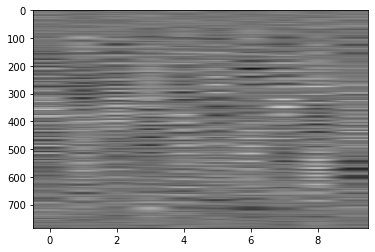

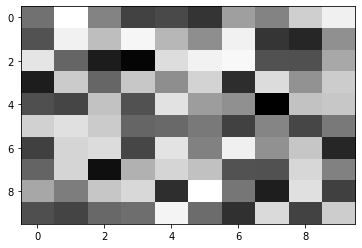

In [ ]:
hidden1 = model.layers[1]
print(hidden1.name)
hidden2 = model.layers[2]
print(hidden2.name)

# access weights and biases
weights1, biases1 = hidden1.get_weights()
print(repr(weights1.shape))
print(repr(biases1.shape))
weights2, biases2 = hidden2.get_weights()
print(repr(weights2.shape))
print(repr(biases2.shape))

plt.clf()
plt.imshow(weights1, cmap='gray_r', aspect='auto')
plt.show()
plt.clf()
plt.imshow(weights2, cmap='gray_r', aspect='auto')
plt.show()

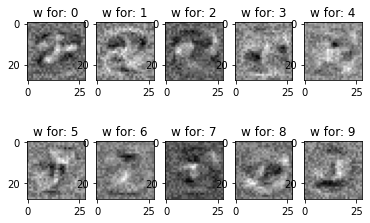

In [ ]:
# let's see the weights for each neuron
plt.clf()
for i in range(weights1.shape[1]):
    plt.subplot(2,5,i+1)
    plt.imshow( np.reshape(weights1[:,i], (28,28)) , cmap='gray_r' )
    plt.title( 'w for: ' + str(i) )
plt.show()

In [ ]:
# let's try to change the model - play around with more layers or units per layer
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(1024, activation='tanh'))
model.add(keras.layers.Dense(512, activation='tanh'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 1024)              803840    
                                                                 
 dense_3 (Dense)             (None, 512)               524800    
                                                                 
 dense_4 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1,333,770
Trainable params: 1,333,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 21s 12ms/step - loss: 0.4759 - accuracy: 0.8721 - val_loss: 0.3095 - val_accuracy: 0.9104
Epoch 2/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.3092 - accuracy: 0.9110 - val_loss: 0.2729 - val_accuracy: 0.9250
Epoch 3/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2798 - accuracy: 0.9200 - val_loss: 0.2541 - val_accuracy: 0.9262
Epoch 4/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2585 - accuracy: 0.9264 - val_loss: 0.2360 - val_accuracy: 0.9334
Epoch 5/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2391 - accuracy: 0.9319 - val_loss: 0.2208 - val_accuracy: 0.9386
Epoch 6/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2211 - accuracy: 0.9375 - val_loss: 0.2040 - val_accuracy: 0.9426
Epoch 7/10
1719/1719 [==============================] - 20s 12ms/step - loss: 0.2036 - accuracy: 0.9431 - val_loss: 0.1887 -

In [ ]:
model.evaluate( X_test, y_test )

313/313 [==============================] - 1s 4ms/step - loss: 0.1601 - accuracy: 0.9533


[0.16008201241493225, 0.9532999992370605]

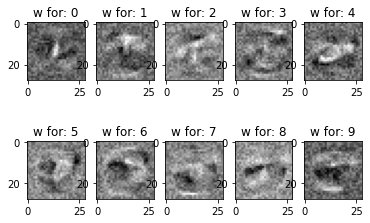

In [ ]:
# let's see the weights for each neuron
# CAUTION: this will not work of shape of weights1 is not 784x1
if weights1.shape[1] == 10:
    plt.clf()
    for i in range(weights1.shape[1]):
        plt.subplot(2,5,i+1)
        plt.imshow( np.reshape(weights1[:,i], (28,28)) , cmap='gray_r' )
        plt.title( 'w for: ' + str(i) )
    plt.show()
else:
    print(weights1.shape[1])
    print('this will not work of shape of weights1 is not 784x1')